# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?


## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

**ENTER YOUR WRITTEN EXPLANATION HERE.**

1. If the data has a normal distribution, I think the percentage of values that will have a first digit of 1 would be around 1%. I think this also holds true for values with the first digit of 9 since there 9 possible first digits from 1 through 9 and 1 and 9 would be at either ends. 

2. If the data has a normal distribution, I think the percentage of 1 and 9 being the last digits would be around 9-10%, or it would have an equal chance of appearing as the last digit as all numbers from 1-9.

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file `sp500.csv` contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [1]:
# ENTER YOUR CODE HERE.
import pandas as pd
df = pd.read_csv("sp500.csv")
# new code
# order data by the volume metric
df = df.set_index("volume")
df = df.sort_index()
df.head()

,date,Name,open,close
volume,,,,
150920,2018-02-01,MTD,$676.00,$684.11
281384,2018-02-01,ADS,$256.26,$257.11
296010,2018-02-01,RE,$228.77,$230.14
319634,2018-02-01,AIZ,$91.40,$93.06
321622,2018-02-01,AZO,$761.32,$764.38


**ENTER YOUR WRITTEN EXPLANATION HERE.**

The unit of observation is most likely the prices or the volume.

We can analyze multiple variables, namely "open", "close", and "volume" since those variables contain values where the first digit matters. "Date" and "name" can also be sorted but they don't contain any values that matter or will give us an interesting representation of the data regarding the first digit distribution. I chose to use "volume" as my index.

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

1    165
2     93
3     59
4     43
5     41
6     36
7     25
8     22
9     21
Name: volume, dtype: int64


<AxesSubplot:>

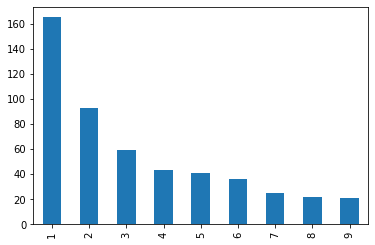

In [2]:
# ENTER YOUR CODE HERE.

import matplotlib 
%matplotlib inline
import pandas as pd
# read from csv using pandas
df = pd.read_csv("sp500.csv")
# convert volume values into string types
df.volume = df.volume.apply(str)
# count the occurence of every string type representing a number
digit_frequency = df.volume.str[0].value_counts()
print(digit_frequency)
digit_frequency.plot.bar()
# plt.hist(df.volume.str[1].apply(int), bins =[0.5,1.5,2.5])

**ENTER YOUR WRITTEN EXPLANATION HERE.**

My prediction from Q0 is very different from what the graph displays on the "volume" attribute. I assumed the data would have some sort of normal distribution but instead it seems the data has a clear leftwards skew meaning the digit 1 has the highest frequency and it gets lower as the digit gets higher.

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

8    56
2    56
9    53
1    53
7    52
0    52
6    51
3    48
5    44
4    40
Name: volume, dtype: int64


<AxesSubplot:>

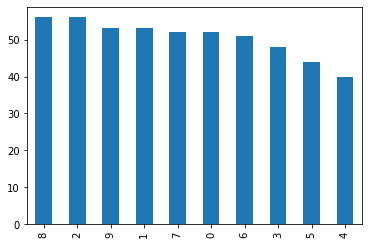

In [3]:
# ENTER YOUR CODE HERE.
import matplotlib 
%matplotlib inline
import pandas as pd
df = pd.read_csv("sp500.csv")
df.volume = df.volume.apply(str)
# -1 for last char
digit_frequency = df.volume.str[-1].value_counts()
print(digit_frequency)
digit_frequency.plot.bar()

**ENTER YOUR WRITTEN EXPLANATION HERE.**

The leftwards skew seems to hold true for the last digit except it seems the higher the digit, the higher the occurrence. This is directly opposite of the distribution of the first digit occurrences.

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

1    171
2     55
3     52
6     48
4     43
7     43
5     39
8     28
9     26
Name: close, dtype: int64


<AxesSubplot:>

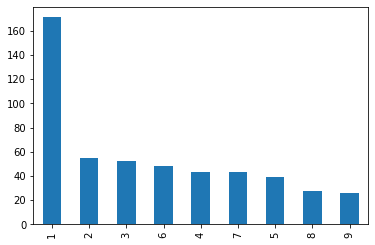

In [4]:
# ENTER YOUR CODE HERE.
import matplotlib 
%matplotlib inline
import pandas as pd
df = pd.read_csv("sp500.csv")
# Apply same method as number 2 but on the close metric
df.close = df.close.apply(str)
digit_frequency = df.close.str[1].value_counts()
print(digit_frequency)
digit_frequency.plot.bar()

**ENTER YOUR WRITTEN EXPLANATION HERE.**

The graph displays a strong leftward skew with the first digit being 1 as having the highest frequency and getting smaller as the digits get higher in order from 1-9. I assume this is because most closing prices seem to be around the numbers 10,100,1000 and so on.

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Demo your lab to obtain credit.  

2. Upload your .ipyn Notebook to iLearn and pdf to Gradescope.